In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_excel("financial_risk_assessment_5000.xlsx")

In [ ]:
print(df.head())

  Country Name Country ISO3 Year-Quarter                 Indicator Name  \
0        India          IND      1980-Q1    Non-Performing Assets (NPA)   
1        India          IND      1980-Q1              Loan Default Rate   
2        India          IND      1980-Q1           Inflation Rate (CPI)   
3        India          IND      1980-Q1  Interest Rate (RBI Repo Rate)   
4        India          IND      1980-Q1                GDP Growth Rate   

  Indicator Code  Value  
0            NPA   8.72  
1            LDR  15.08  
2        INF_CPI  13.80  
3       INT_RATE   8.82  
4         GDP_GR   6.09  


In [ ]:
df.head()

,Country Name,Country ISO3,Year-Quarter,Indicator Name,Indicator Code,Value
0,India,IND,1980-Q1,Non-Performing Assets (NPA),NPA,8.72
1,India,IND,1980-Q1,Loan Default Rate,LDR,15.08
2,India,IND,1980-Q1,Inflation Rate (CPI),INF_CPI,13.80
3,India,IND,1980-Q1,Interest Rate (RBI Repo Rate),INT_RATE,8.82
4,India,IND,1980-Q1,GDP Growth Rate,GDP_GR,6.09


In [ ]:
df.shape

(3060, 6)

In [ ]:
df.describe()

,Value
count,3060.000000
mean,10.873480
std,5.191765
min,2.010000
25%,6.280000
50%,10.935000
75%,15.322500
max,20.000000


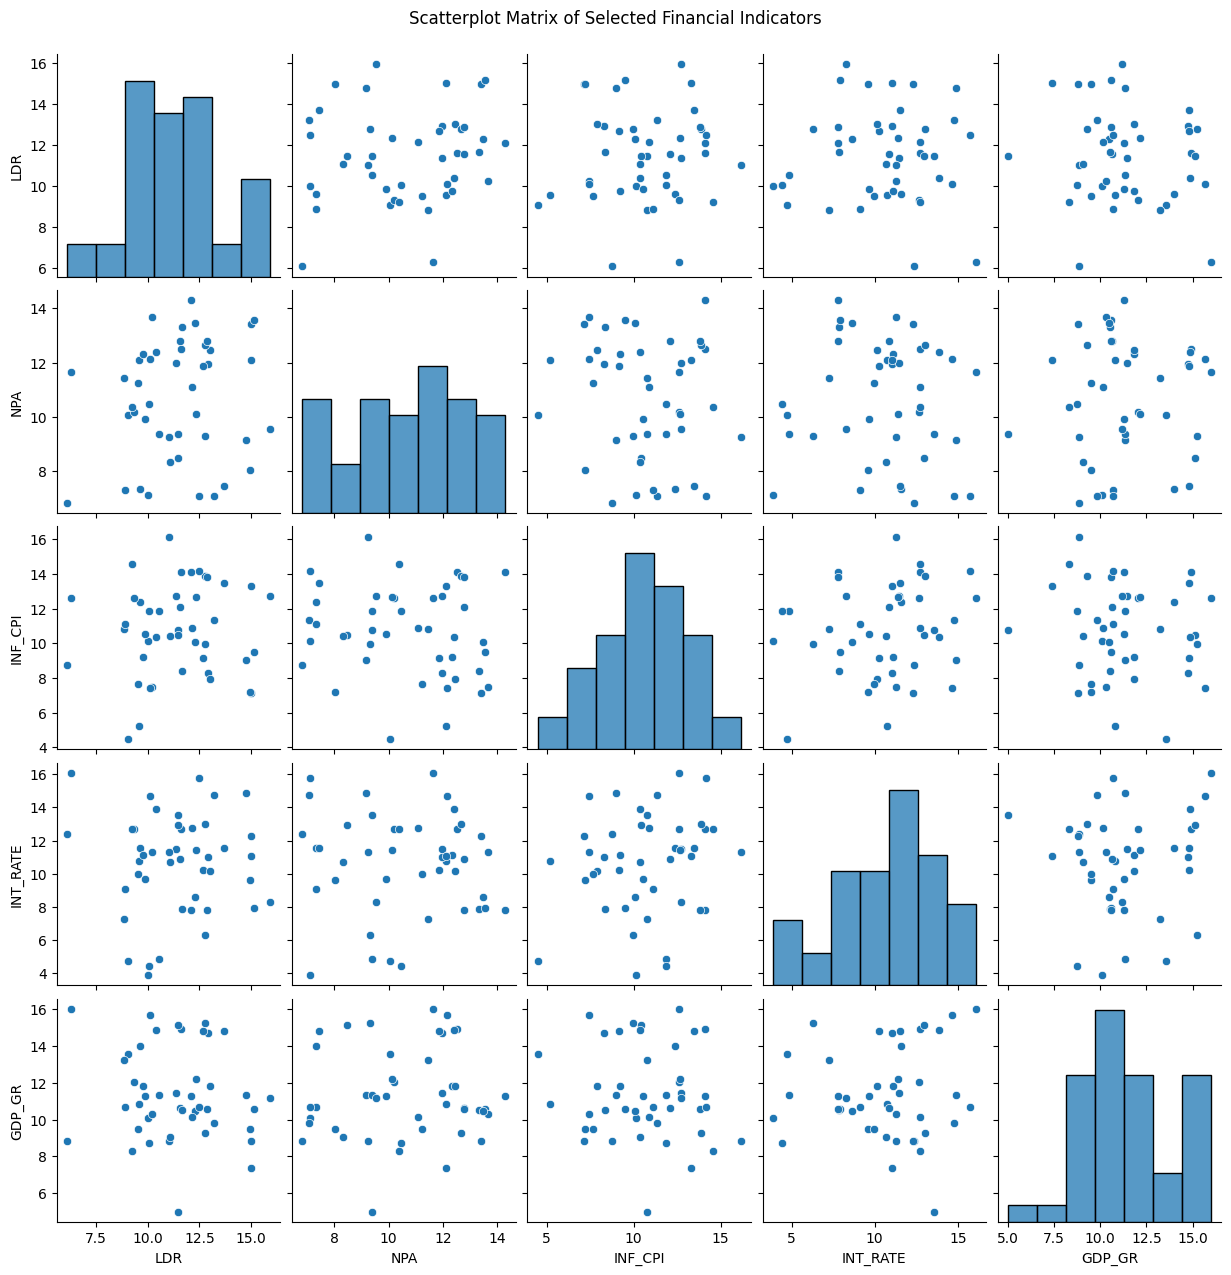

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("financial_risk_assessment_5000.xlsx")

df["Year"] = df["Year-Quarter"].str[:4].astype(int)

df_pivot = df.pivot_table(index=["Year"], columns="Indicator Code", values="Value").reset_index()

selected_indicators = ["LDR", "NPA", "INF_CPI", "INT_RATE", "GDP_GR"]

sns.pairplot(df_pivot[selected_indicators])
plt.suptitle("Scatterplot Matrix of Selected Financial Indicators", y=1.02)
plt.show()
plt.tight_layout()
plt.show()


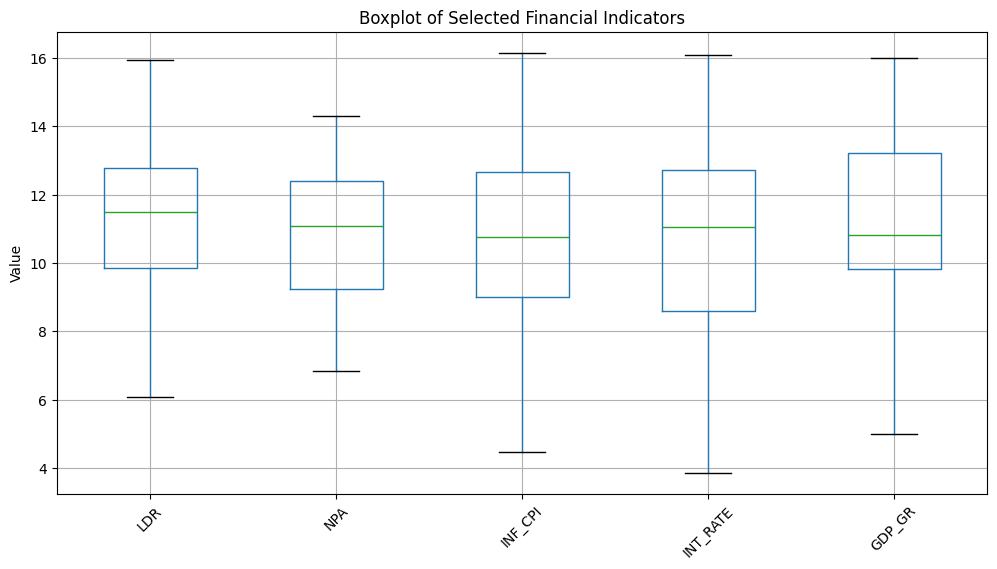

In [ ]:
# Boxplots
plt.figure(figsize=(12, 6))
df_pivot[selected_indicators].boxplot()
plt.title("Boxplot of Selected Financial Indicators")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

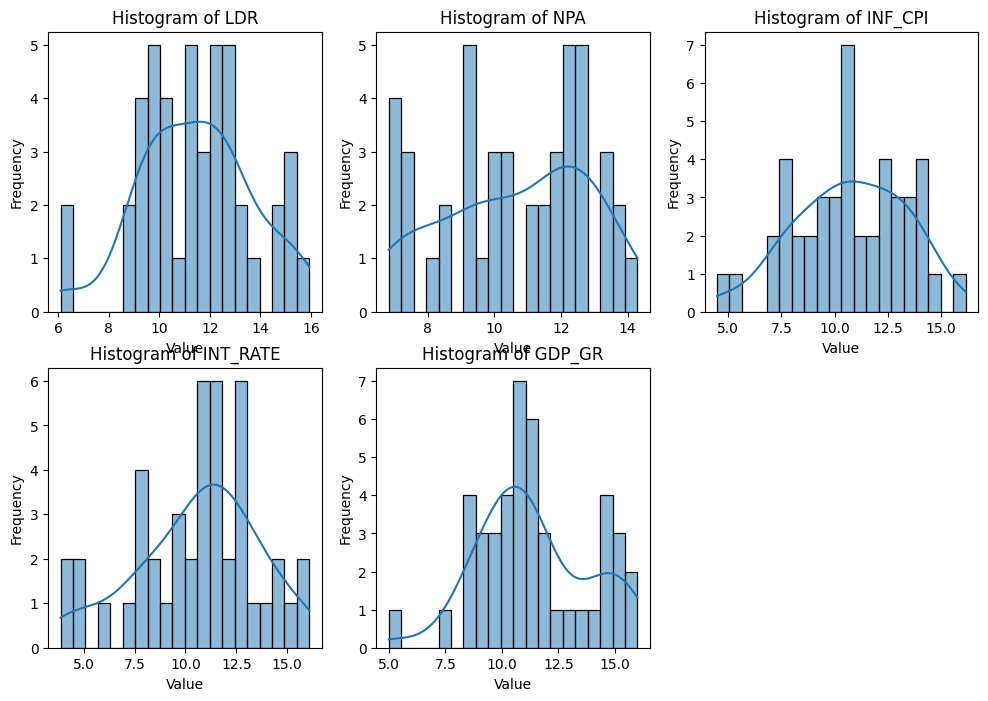

In [ ]:
plt.figure(figsize=(12, 8))
for i, indicator in enumerate(selected_indicators, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_pivot[indicator], bins=20, kde=True)
    plt.title(f"Histogram of {indicator}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

In [ ]:
df["Year"] = df["Year-Quarter"].str[:4].astype(int)
df.drop("Year-Quarter", axis=1, inplace=True)


In [ ]:
df_pivot = df.pivot_table(index=["Year"], columns="Indicator Code", values="Value").reset_index()


In [ ]:
target_variable = "LDR"
X = df_pivot.drop(columns=[target_variable])
y = df_pivot[target_variable]


# Split dataset

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data (Important for SVM)

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train Random Forest

In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


# Train XGBoost

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


# Train SVM

In [ ]:
svm_model = SVR(kernel="rbf")
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)


# Evaluating  models


In [ ]:
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - RMSE: {rmse:.4f}, R² Score: {r2:.4f}")


In [ ]:
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("SVM", y_test, svm_preds)

Random Forest - RMSE: 2.0672, R² Score: -0.7727
XGBoost - RMSE: 2.6002, R² Score: -1.8049
SVM - RMSE: 1.6631, R² Score: -0.1473


In [ ]:
from scipy.stats import ttest_ind, norm
import numpy as np

# Assume y_test and model predictions (rf_preds, xgb_preds, svm_preds) are defined

# Calculate residuals
rf_errors = y_test - rf_preds
xgb_errors = y_test - xgb_preds
svm_errors = y_test - svm_preds

# T-tests
print("T-test Results:")
print("RF vs XGB:", ttest_ind(rf_errors, xgb_errors))
print("RF vs SVM:", ttest_ind(rf_errors, svm_errors))
print("XGB vs SVM:", ttest_ind(xgb_errors, svm_errors))

# Z-test function
def z_test(sample1, sample2):
    n1, n2 = len(sample1), len(sample2)
    mean_diff = np.mean(sample1) - np.mean(sample2)
    pooled_std = np.sqrt(np.var(sample1, ddof=1)/n1 + np.var(sample2, ddof=1)/n2)
    z = mean_diff / pooled_std
    p = 2 * (1 - norm.cdf(abs(z)))
    return z, p

# Z-tests
print("Z-test Results:")
print("RF vs XGB:", z_test(rf_errors, xgb_errors))
print("RF vs SVM:", z_test(rf_errors, svm_errors))
print("XGB vs SVM:", z_test(xgb_errors, svm_errors))


T-test Results:
RF vs XGB: TtestResult(statistic=np.float64(0.8412252735486188), pvalue=np.float64(0.41261823838323275), df=np.float64(16.0))
RF vs SVM: TtestResult(statistic=np.float64(-0.1157384834802842), pvalue=np.float64(0.909299968158318), df=np.float64(16.0))
XGB vs SVM: TtestResult(statistic=np.float64(-1.027326625897095), pvalue=np.float64(0.31954817430312704), df=np.float64(16.0))
Z-test Results:
RF vs XGB: (np.float64(0.841225273548619), np.float64(0.4002217443977458))
RF vs SVM: (np.float64(-0.1157384834802842), np.float64(0.9078598057786049))
XGB vs SVM: (np.float64(-1.027326625897095), np.float64(0.3042666888688288))


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind, norm

# Assume y_test and model predictions are defined: rf_preds, xgb_preds, svm_preds

# Step 1: Calculate metrics
models = {
    "Random Forest": rf_preds,
    "XGBoost": xgb_preds,
    "SVM": svm_preds
}

mse_scores = {name: mean_squared_error(y_test, preds) for name, preds in models.items()}
r2_scores = {name: r2_score(y_test, preds) for name, preds in models.items()}

# Step 2: Find the best model based on MSE (lower is better)
best_mse_model = min(mse_scores, key=mse_scores.get)
best_r2_model = max(r2_scores, key=r2_scores.get)

print("📊 Model Performance:")
for name in models:
    print(f"{name} -> MSE: {mse_scores[name]:.4f}, R²: {r2_scores[name]:.4f}")

print(f"\n✅ Best Model by MSE: {best_mse_model}")
print(f"✅ Best Model by R²: {best_r2_model}")

# Step 3: Statistical Testing (T-test and Z-test)
def z_test(sample1, sample2):
    n1, n2 = len(sample1), len(sample2)
    mean_diff = np.mean(sample1) - np.mean(sample2)
    pooled_std = np.sqrt(np.var(sample1, ddof=1)/n1 + np.var(sample2, ddof=1)/n2)
    z = mean_diff / pooled_std
    p = 2 * (1 - norm.cdf(abs(z)))
    return z, p

# Residuals (errors)
errors = {name: y_test - preds for name, preds in models.items()}
model_names = list(models.keys())

print("\n🧪 Statistical Test Results:")

for i in range(len(model_names)):
    for j in range(i + 1, len(model_names)):
        m1, m2 = model_names[i], model_names[j]
        # T-test
        t_stat, t_p = ttest_ind(errors[m1], errors[m2])
        # Z-test
        z_stat, z_p = z_test(errors[m1], errors[m2])
        print(f"\n{m1} vs {m2}:")
        print(f"  T-test: t = {t_stat:.4f}, p = {t_p:.4f}")
        print(f"  Z-test: z = {z_stat:.4f}, p = {z_p:.4f}")


📊 Model Performance:
Random Forest -> MSE: 4.2731, R²: -0.7727
XGBoost -> MSE: 6.7613, R²: -1.8049
SVM -> MSE: 2.7658, R²: -0.1473

✅ Best Model by MSE: SVM
✅ Best Model by R²: SVM

🧪 Statistical Test Results:

Random Forest vs XGBoost:
  T-test: t = 0.8412, p = 0.4126
  Z-test: z = 0.8412, p = 0.4002

Random Forest vs SVM:
  T-test: t = -0.1157, p = 0.9093
  Z-test: z = -0.1157, p = 0.9079

XGBoost vs SVM:
  T-test: t = -1.0273, p = 0.3195
  Z-test: z = -1.0273, p = 0.3043


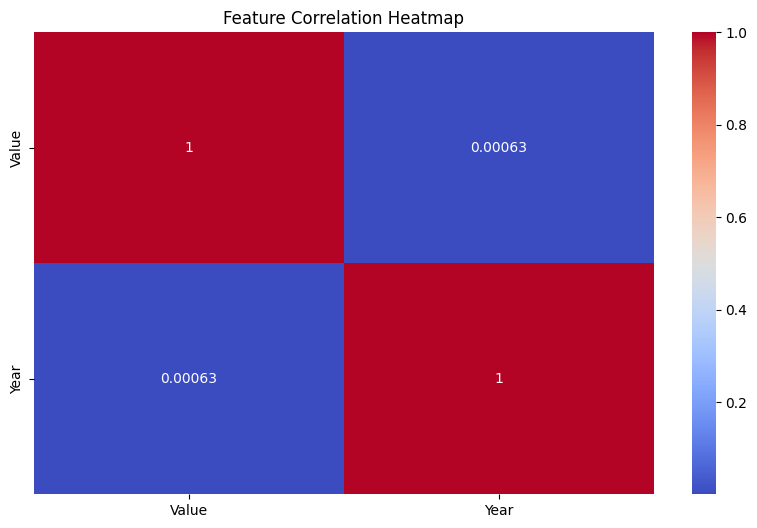

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
